In [1]:
# step 1: Import required Laibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#step 2: Load the Dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# Step 3: Initial Data Cleaning and Exploration
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data['ToatalCharges']  =pd.to_numeric(data['TotalCharges'],errors= 'coerce')

In [8]:
data.dropna(inplace = True)

In [9]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ToatalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15


In [12]:
# Analysis & Visualization
sns.set_palette('pastel')
plt.style.use('fivethirtyeight')

In [16]:
# The Overall Churn Rate # Main KPI
churn_rate = data['Churn'].value_counts(normalize=True)
print("___Overall Churn Rate___")
print(churn_rate)

___Overall Churn Rate___
Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


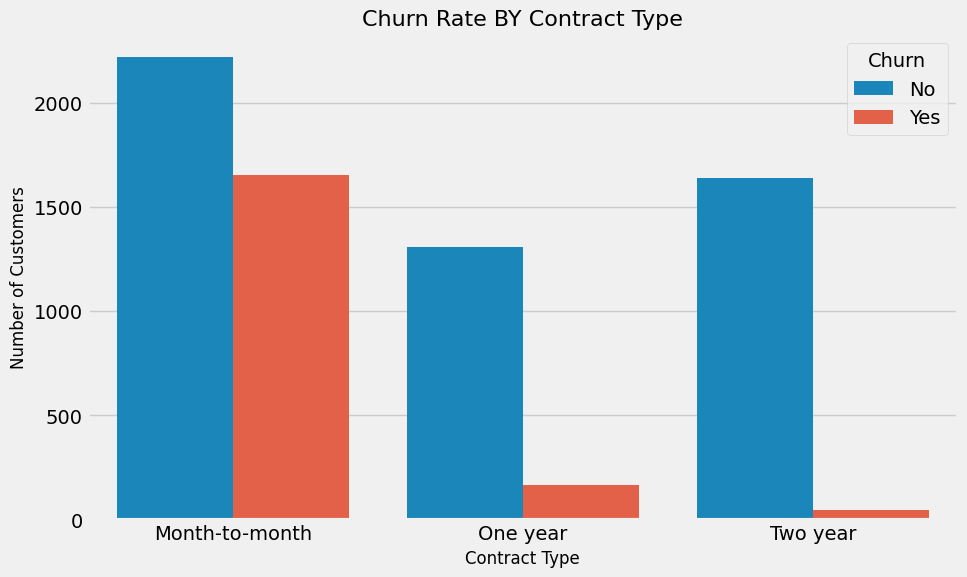

In [17]:
# the contract type affect churn
plt.figure(figsize= (10,6))
sns.countplot(data = data, x = 'Contract', hue = 'Churn')
plt.title('Churn Rate BY Contract Type', fontsize = 16)
plt.xlabel('Contract Type', fontsize = 12)
plt.ylabel('Number of Customers',fontsize = 12)
plt.legend(title='Churn')
plt.show()

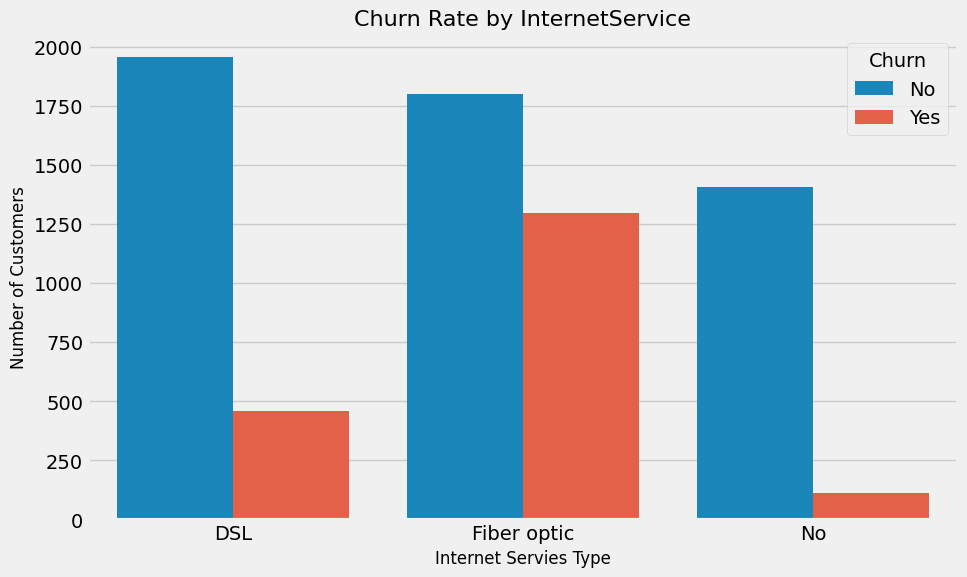

In [22]:
# Internet service type affect churn
plt.figure(figsize = (10,6))
sns.countplot(data=data, x = 'InternetService', hue= 'Churn')
plt.title('Churn Rate by InternetService', fontsize= 16)
plt.xlabel('Internet Servies Type', fontsize = 12)
plt.ylabel('Number of Customers', fontsize =12)
plt.legend(title='Churn')
plt.show()

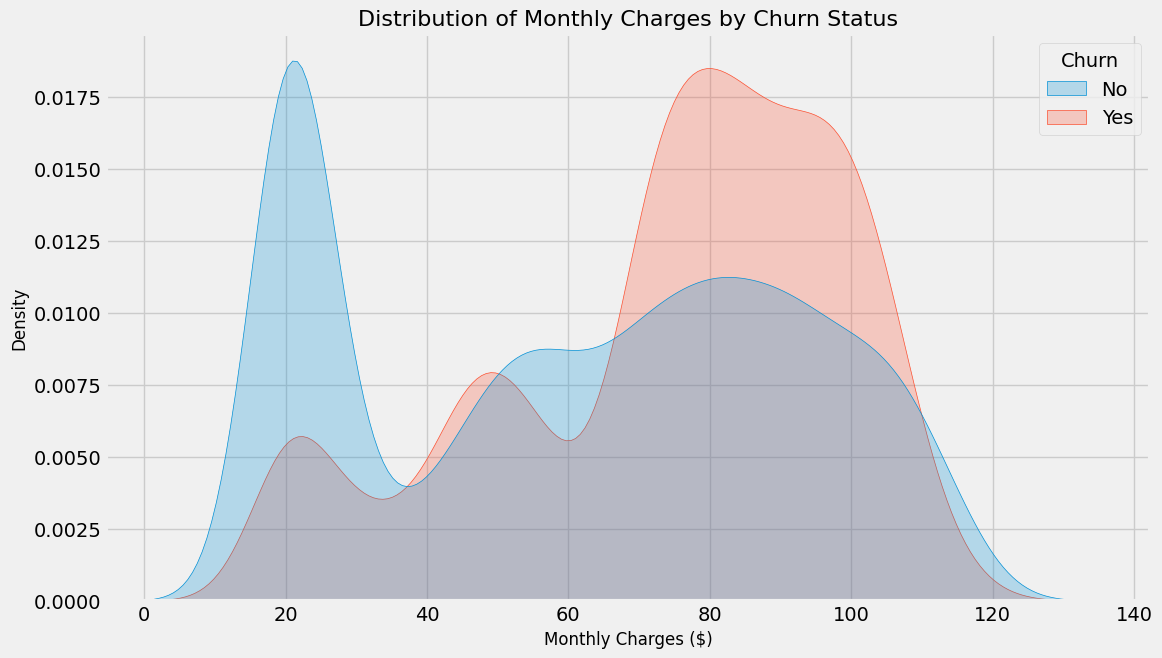

In [24]:
plt.figure(figsize=(12, 7))
sns.kdeplot(data=data, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False)
plt.title('Distribution of Monthly Charges by Churn Status', fontsize=16)
plt.xlabel('Monthly Charges ($)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

In [ ]:
# --- FINAL CONCLUSION ---
# Based on the analysis, the customers most likely to churn are those on a
# month-to-month contract, with fiber optic internet, and higher monthly charges.
# A key business recommendation would be to create targeted offers to incentivize
# these high-risk customers to switch to a one or two-year contract.
